In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# Read dataset

In [3]:
df = pd.read_csv('./songs_normalize.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


# Use one-hot encoding to create new columns for each genre

In [4]:
unique_features = []
genres = df["genre"].str.strip()
for genre in genres:
    for g in genre.split(','):
        unique_features.append(g.strip())
unique_features = set(unique_features)
unique_features

{'Dance/Electronic',
 'Folk/Acoustic',
 'R&B',
 'World/Traditional',
 'blues',
 'classical',
 'country',
 'easy listening',
 'hip hop',
 'jazz',
 'latin',
 'metal',
 'pop',
 'rock',
 'set()'}

## Remove "set()" from genre

In [5]:
mask = df["genre"].str.contains("set")
df = df[~mask]
df = df.reset_index()
df = df.drop('index', axis=1)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1974,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1975,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1976,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## Assign genres to dataframe

In [6]:
genre_feature = []
genres = df["genre"].str.strip()
for genre in genres:
    genre_feature.append(",".join(['genre.' + g.strip() for g in genre.split(',')]))
    
df['genre'] = genre_feature

genres = df['genre'].str.get_dummies(sep=",")
df = pd.concat([df, genres], axis=1)

In [7]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,genre.blues,genre.classical,genre.country,genre.easy listening,genre.hip hop,genre.jazz,genre.latin,genre.metal,genre.pop,genre.rock
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,0,1,0
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0,0,0,0,0,0,0,0,1,1
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0,0,1,0,0,0,0,0,1,0
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0,0,0,0,0,0,0,1,0,1
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,0,0,0,0,0,0,0,0,1,0
1974,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,0,0,0,0,0,0,0,0,1,0
1975,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,0,0,1,0,1,0,0,0,0,0
1976,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,0,0,0,0,0,0,0,0,1,0


In [8]:
df.shape

(1978, 32)

# Preprocessing

## Check missing values

In [9]:
df.isnull().sum()

artist                     0
song                       0
duration_ms                0
explicit                   0
year                       0
popularity                 0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
genre                      0
genre.Dance/Electronic     0
genre.Folk/Acoustic        0
genre.R&B                  0
genre.World/Traditional    0
genre.blues                0
genre.classical            0
genre.country              0
genre.easy listening       0
genre.hip hop              0
genre.jazz                 0
genre.latin                0
genre.metal                0
genre.pop                  0
genre.rock                 0
dtype: int64

In [10]:
df.isna().sum()

artist                     0
song                       0
duration_ms                0
explicit                   0
year                       0
popularity                 0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
genre                      0
genre.Dance/Electronic     0
genre.Folk/Acoustic        0
genre.R&B                  0
genre.World/Traditional    0
genre.blues                0
genre.classical            0
genre.country              0
genre.easy listening       0
genre.hip hop              0
genre.jazz                 0
genre.latin                0
genre.metal                0
genre.pop                  0
genre.rock                 0
dtype: int64

## Check datatypes

In [11]:
df.dtypes

artist                      object
song                        object
duration_ms                  int64
explicit                      bool
year                         int64
popularity                   int64
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
genre                       object
genre.Dance/Electronic       int64
genre.Folk/Acoustic          int64
genre.R&B                    int64
genre.World/Traditional      int64
genre.blues                  int64
genre.classical              int64
genre.country                int64
genre.easy listening         int64
genre.hip hop                int64
genre.jazz                   int64
genre.latin         

In [12]:
df = df.astype({"explicit": int})

## Remove duplicate rows

In [13]:
df.drop_duplicates(inplace=True)
df = df.reset_index()
df = df.drop('index', axis=1)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,genre.blues,genre.classical,genre.country,genre.easy listening,genre.hip hop,genre.jazz,genre.latin,genre.metal,genre.pop,genre.rock
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,0,1,0
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,...,0,0,0,0,0,0,0,0,1,1
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,...,0,0,1,0,0,0,0,0,1,0
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,...,0,0,0,0,0,0,0,1,0,1
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,Jonas Brothers,Sucker,181026,0,2019,79,0.842,0.734,1,-5.065,...,0,0,0,0,0,0,0,0,1,0
1915,Taylor Swift,Cruel Summer,178426,0,2019,78,0.552,0.702,9,-5.707,...,0,0,0,0,0,0,0,0,1,0
1916,Blanco Brown,The Git Up,200593,0,2019,69,0.847,0.678,9,-8.635,...,0,0,1,0,1,0,0,0,0,0
1917,Sam Smith,Dancing With A Stranger (with Normani),171029,0,2019,75,0.741,0.520,8,-7.513,...,0,0,0,0,0,0,0,0,1,0


## Dataset describe

In [14]:
df.describe()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,...,genre.blues,genre.classical,genre.country,genre.easy listening,genre.hip hop,genre.jazz,genre.latin,genre.metal,genre.pop,genre.rock
count,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000,...,1919.000000,1919.000000,1919.000000,1919.000000,1919.00000,1919.000000,1919.000000,1919.000000,1919.000000,1919.000000
mean,228761.545076,0.278791,2009.523710,59.658155,0.666998,0.721349,5.387181,-5.510079,0.552892,0.104229,...,0.002084,0.000521,0.010422,0.003648,0.39135,0.001042,0.032830,0.033351,0.824388,0.117249
std,39188.660750,0.448521,5.881462,21.573138,0.140733,0.152861,3.607960,1.942778,0.497324,0.096449,...,0.045620,0.022828,0.101582,0.060302,0.48818,0.032275,0.178237,0.179597,0.380589,0.321800
min,113000.000000,0.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,203560.000000,0.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.480000,0.000000,0.039900,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,223253.000000,0.000000,2010.000000,65.000000,0.676000,0.738000,6.000000,-5.283000,1.000000,0.061200,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,248133.000000,1.000000,2015.000000,73.000000,0.764000,0.840000,8.000000,-4.168000,1.000000,0.130000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,484146.000000,1.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Histogram of features before normalization

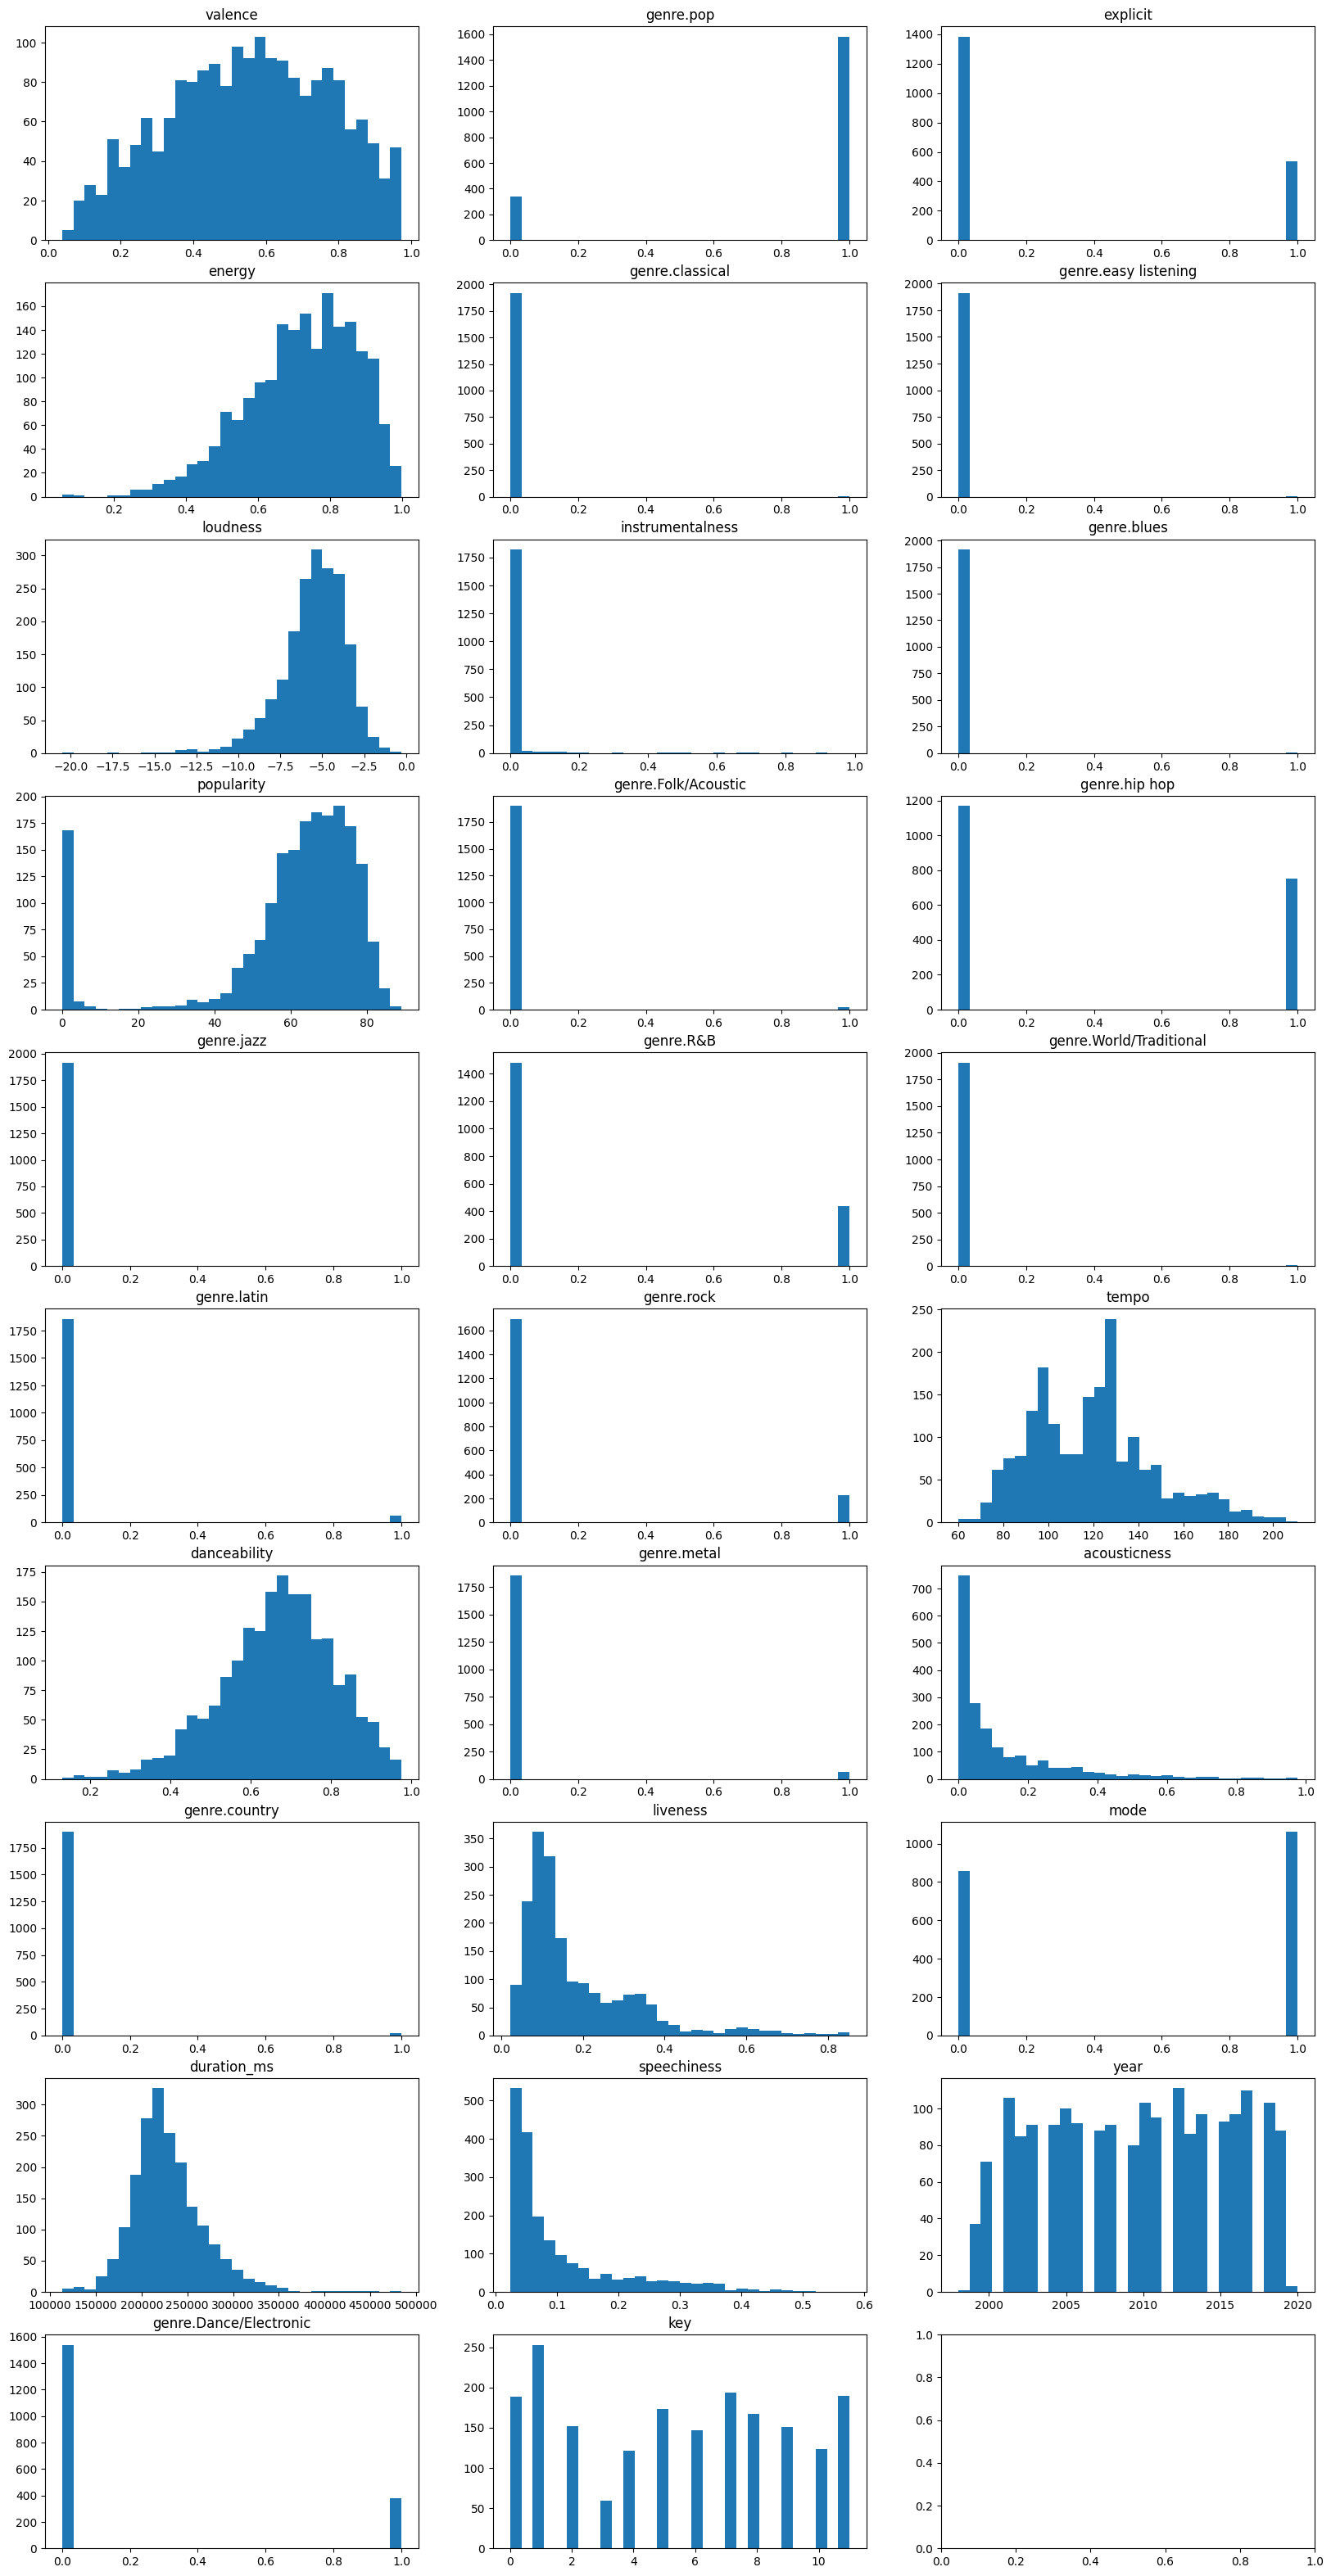

In [15]:
nominal_features = ['artist', 'song', 'genre']
cols = list(set(df.columns) - set(nominal_features))

fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

## Normalizing dataset

In [16]:
main_df = df

In [17]:
numeric_features_df = df.drop(nominal_features, axis=1)
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(numeric_features_df)

In [18]:
scaler = preprocessing.MinMaxScaler()
normalized = scaler.fit_transform(scaled)
df = pd.DataFrame(normalized, columns=[cols])
df

,valence,genre.pop,explicit,energy,genre.classical,genre.easy listening,loudness,instrumentalness,genre.blues,popularity,...,genre.metal,acousticness,genre.country,liveness,mode,duration_ms,speechiness,year,genre.Dance/Electronic,key
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1915,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1916,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1917,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Histogram after normalization

In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

# Exploring and analyzing the data

## Most popular songs by year

In [ ]:
most_popular = main_df.query('popularity>=80', inplace=False).sort_values('popularity', ascending=False)
most_popular[:10]

In [ ]:
songs_by_year =most_popular.groupby("year").size().to_frame(name = 'songs').reset_index()

plt.figure(figsize = (18,7))
plots = sns.barplot(x = 'year', y = 'songs', data = songs_by_year, palette = 'viridis')

for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

plt.xlabel('Year of release', size = 13)
plt.ylabel('Number of songs', size = 13)
plt.title('Number of songs by year (2000 - 2019)', size = 18)
plt.show()

## Heatmap

In [ ]:
cols = [col for col in main_df.columns if 'genre' in col]
corr_df = main_df.drop(cols, axis=1)

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_df.corr(), annot = True, linewidths = .5, fmt = '.1f', cmap = "viridis")
plt.title('Correlation between different parameters of a song', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

## Popular artists

In [ ]:
popularity_by_artist = main_df.groupby('artist', as_index = False)['popularity'] \
                                .sum().sort_values(['popularity'],ascending=False)

popularity_by_artist['popularity'] = popularity_by_artist['popularity'].astype('Int64')

popularity_by_artist = popularity_by_artist.head(10)

plt.figure(figsize = (18,7))
plots = sns.barplot(x = 'artist', y = 'popularity', data = popularity_by_artist, palette = 'viridis')

for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

plt.xlabel('Artist', size = 13)
plt.ylabel('Popularity', size = 13)
plt.title('Most popular artists', size = 18)
plt.show()

## Popular genres

In [ ]:
genres_dic = {}
for row in main_df.index:
    for col in main_df.columns:
        if 'genre' in col and col != 'genre':
            if main_df.at[row, col] == 1:
                genre_name = col.replace('genre.', '')
                genres_dic[genre_name] = genres_dic.get(genre_name, 0) + 1

genre_dic_df = {'Genres':[], 'Songs':[]}
for key, value in genres_dic.items():
    genre_dic_df['Genres'].append(key)
    genre_dic_df['Songs'].append(value)

genre_df = pd.DataFrame(genre_dic_df).sort_values(['Songs'],ascending=False)
genre_df

In [ ]:
plt.figure(figsize = (10,7))
plots = sns.barplot(x = 'Songs', y = 'Genres', data = genre_df, palette = 'rocket')  

plt.xlabel('Number of songs', size = 13)
plt.ylabel('Genre', size = 13)
  
plt.title('Number of songs by genre (1998 - 2020)', size = 18)

plt.show()